# Data Visualisation

- Data visualtion is a simple act of showcasing the data in a visual context
- Data analysis is the story one would want to tell the audience but visuals are the backbone and appeal one would desire to present

### Importance of Data Visualization:-
- Data visualizations simplifies things for human brain to understand small or large datasets
- It makes it easier to detect patterns, trends, and outliers in clusters of data

### How to tell a story?
- Understand the context
- Choose an appropriate visual display
- Eliminate clutter
- Focus attention where you want it
- Think like a designer
- Tell a story ([Data Story Telling]([https://www.amazon.com/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257))

# Seaborn

- Seaborn is a Python data visualization library based on matplotlib
- It provides a high-level interface for drawing attractive and informative statistical graphics

<img align="left" width="200" height="200" src="https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png">
<img align="left" width="200" height="200" src="https://seaborn.pydata.org/_static/errorband_lineplots_thumb.png">
<img align="left" width="200" height="200" src="https://seaborn.pydata.org/_static/horizontal_boxplot_thumb.png">
<img align="left" width="200" height="200" src="https://seaborn.pydata.org/_static/regression_marginals_thumb.png">

### Installation

Use below command in jupyter notebook to install the seaborn library

`!pip install seaborn`

[Installation Guide](https://seaborn.pydata.org/installing.html)

In [1]:
# importing necessary libraries as per the dataset
# I'm using uber request data set here
import pandas as pd
import numpy as np

import seaborn as sns
import datetime as dt
import pandas as pd

# Data Visualation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import axes_style
import seaborn as sns

- In this notebook you will see the different plots using seaborn library
- Along with visualizations you will also see how you can explore the data or perform EDA

## Exploratory Data Analysis (EDA)
- In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods
- A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task
- [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [DataCamp](https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda)

In [6]:
#loading dataset
df = pd.read_csv(r'Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
# Helper Function - Missing data check
def missing_data(data):
    missing = data.isnull().sum()
    available = data.count()
    total = (missing + available)
    percent = (data.isnull().sum()/data.isnull().count()*100).round(4)
    return pd.concat([missing, available, total, percent], axis=1, keys=['Missing', 'Available', 'Total', 'Percent']).sort_values(['Missing'], ascending=False)

In [8]:
#Getting the information on the data for the purpose of cleaning up
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
missing_data(df1)

,Missing,Available,Total,Percent
Drop timestamp,3914,2831,6745,58.0282
Driver id,2650,4095,6745,39.2884
Request id,0,6745,6745,0.0000
Pickup point,0,6745,6745,0.0000
Status,0,6745,6745,0.0000
Request timestamp,0,6745,6745,0.0000


In [29]:
df1.describe()

,Request id,Driver id,Request Hour
count,6745.000000,4095.000000,6745.000000
mean,3384.644922,149.501343,12.956709
std,1955.099667,86.051994,6.504052
min,1.000000,1.000000,0.000000
25%,1691.000000,75.000000,7.000000
50%,3387.000000,149.000000,13.000000
75%,5080.000000,224.000000,19.000000
max,6766.000000,300.000000,23.000000


In [11]:
#Finding out the demand of cars based on the trip completion to requests made data
cars_on_demand = pd.DataFrame({'Total No. of Drivers':[df1['Driver id'].nunique()], 
                                 'Total Demand Per Day':[df1['Request id'].nunique()/5],
                                'Trips Completed Per Day':df1[(df1['Status']=='Trip Completed')].shape[0]/5})
cars_on_demand

,Total No. of Drivers,Total Demand Per Day,Trips Completed Per Day
0,300,1349.0,566.2


In [12]:
# Average requests per driver
cars_on_demand['Total Demand Per Day']/cars_on_demand['Total No. of Drivers']

0    4.496667
dtype: float64

In [13]:
# Formatting request timestamp and drop timestamp columns- This is a part of data cleanup
df1["Request timestamp"] = pd.to_datetime(df1["Request timestamp"], dayfirst=True)
df1["Drop timestamp"] = pd.to_datetime(df1["Drop timestamp"], dayfirst=True)

In [14]:
#Making the data easier to read by deriving metrics and adding new columns
df1['Request Date'] = df1["Request timestamp"].dt.date
df1['Request Time'] = df1["Request timestamp"].dt.time
df1['Drop Date'] = df1["Drop timestamp"].dt.date
df1['Drop Time'] = df1["Drop timestamp"].dt.time
#adding Weekday and hour information on the data set
df1['Request Weekday'] = df1['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df1['Request Hour'] = df1['Request timestamp'].apply(lambda x: x.hour)

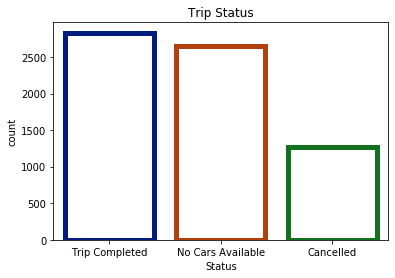

In [15]:
# plotting graph for trip status to show the different states-Trips requested, cancelled and completed
plt.title('Trip Status')
ax = sns.countplot(x="Status", data=df1,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), 
                   order = df1['Status'].value_counts().index)



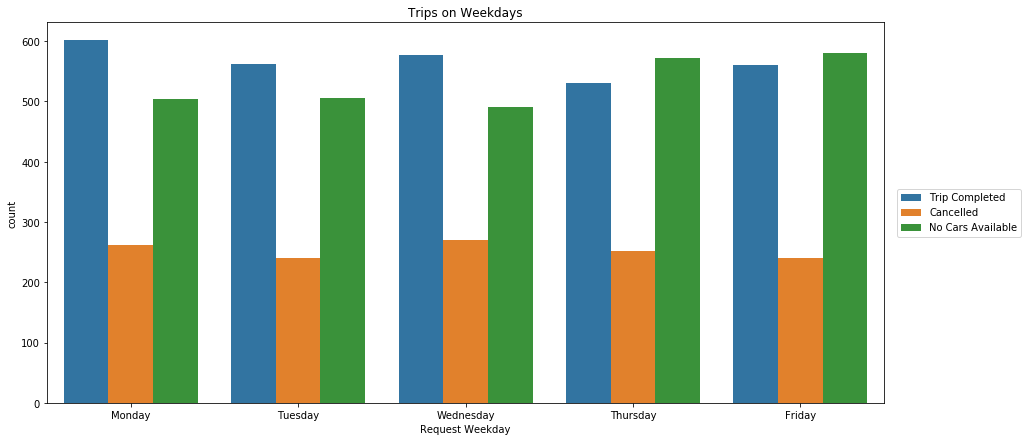

In [16]:
#Plotting the trip information on Weekdays
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Trips on Weekdays")
ax1 = sns.countplot(x='Request Weekday',hue='Status',data=df1)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

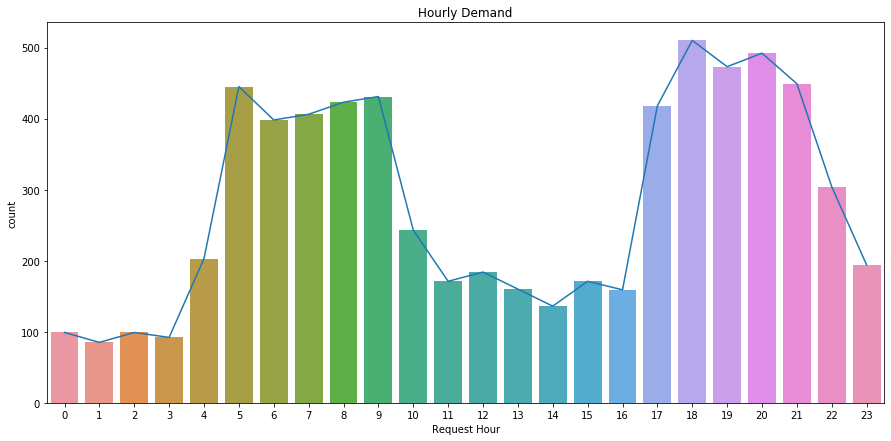

In [17]:
# plot data to show hourly distribution of request/demand
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
df1.groupby(df1['Request Hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df1['Request Hour'])

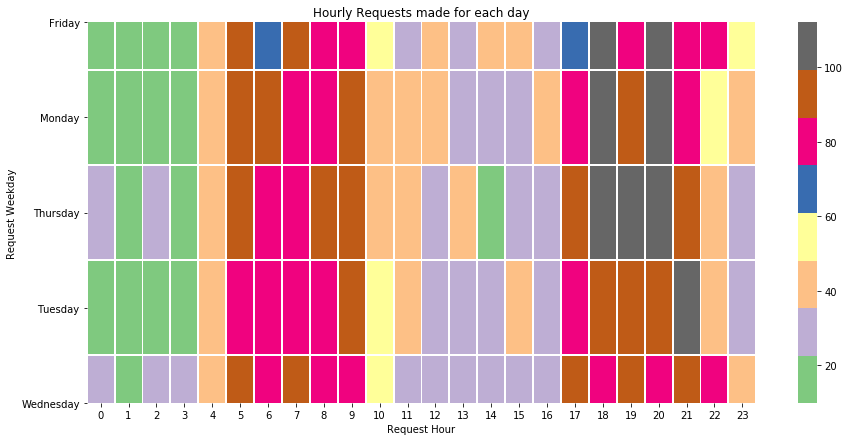

In [18]:
#Heatmap data for requests with weekdays and hours
heat_data_demand = df1.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
heat_data_demand.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
# plot data to show hourly request heatmap
fig, ax = plt.subplots(figsize=(15,7))

plt.title('Hourly Requests made for each day')
sns.heatmap(heat_data_demand.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="Accent")
plt.yticks(rotation=0)
plt.show()

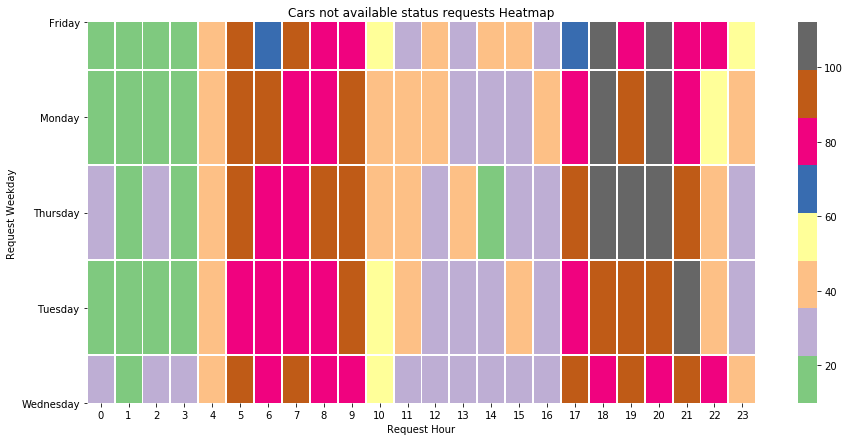

In [19]:
#Heatmap data for 'No cars Available' Status on weekdays and hours
cars_notavailable = df1[df1["Driver id"].isnull()]
cars_notavailable.head()
heat_data_no_cars = cars_notavailable.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
heat_data_no_cars.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
# plot data to show hourly distribution of requests when cars were not available
fig, ax = plt.subplots(figsize=(15,7))

plt.title('Cars not available status requests Heatmap')
sns.heatmap(heat_data_demand.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="Accent")
plt.yticks(rotation=0)
plt.show()

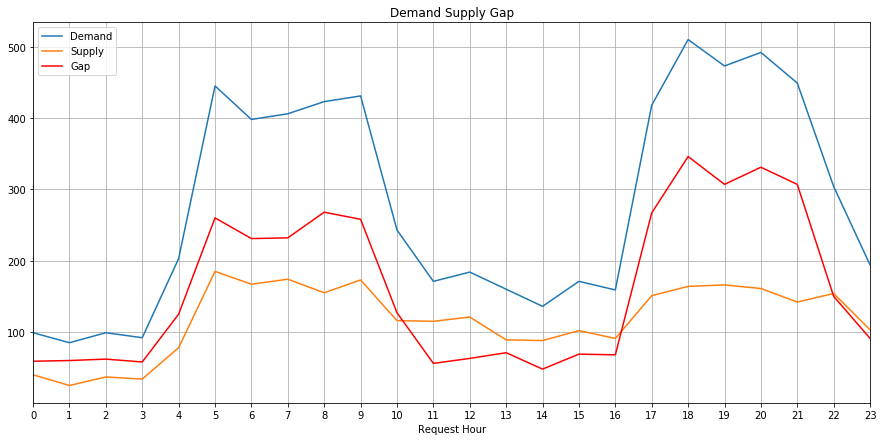

In [20]:
#Plotting the distribution of Demand(requests made), Supply(Requests Completed) and Gap (Requests rejected)
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df1.groupby(df1['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
df1[df1['Status']=="Trip Completed"].groupby(df1[df1['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(df1.groupby(df1['Request Hour']).count()['Request id'] - df1[df1['Status']=="Trip Completed"].groupby(df1[df1['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

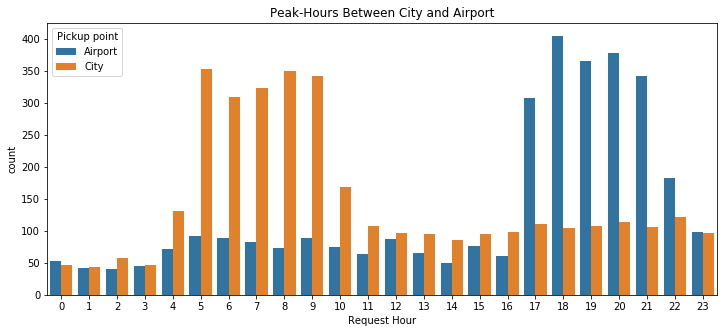

In [21]:
# plot hourly data to visualize peakhours from city to airport and airport to city trip
plt.subplots(figsize=(12,5))
plt.title("Peak-Hours Between City and Airport")
sns.countplot(x='Request Hour',hue='Pickup point',data=df1)

In [22]:
#creating two dataframes for City and Airport seperate analysis
city_pick = df1[df1['Pickup point']=="City"]
airport_pick = df1[df1['Pickup point']=="Airport"]

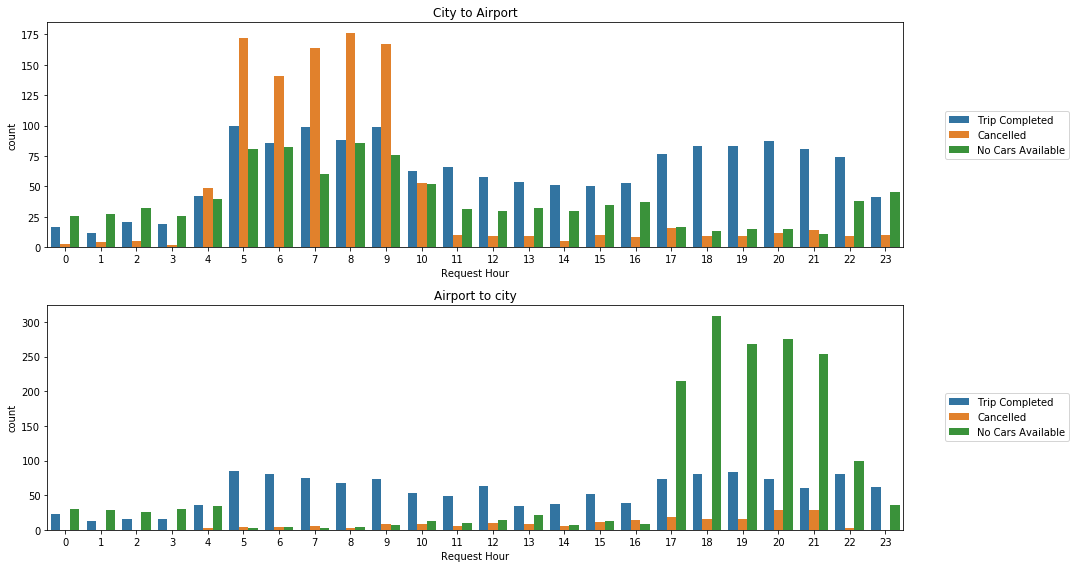

In [23]:
# plot data to get count of status for airport to city and city to airport trips
f = plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("City to Airport")
sns.countplot(x='Request Hour',hue='Status',data=city_pick)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport to city")
sns.countplot(x='Request Hour',hue='Status',data=airport_pick)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()

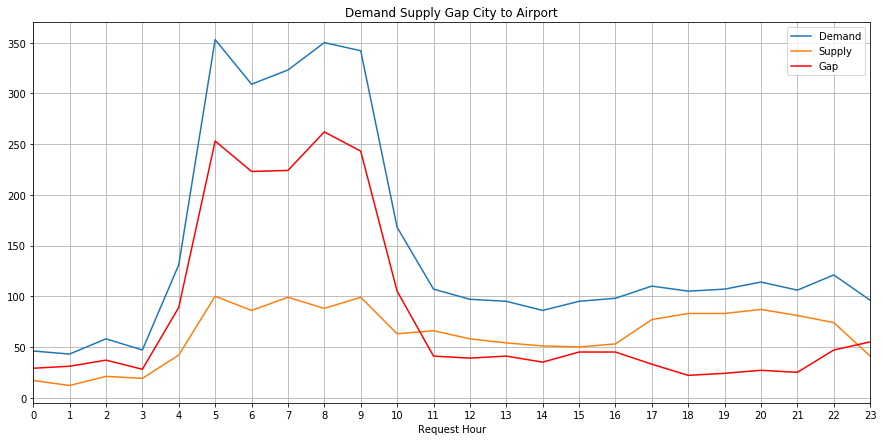

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
city_pick.groupby(city_pick['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
city_pick[city_pick['Status']=="Trip Completed"].groupby(city_pick[city_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(city_pick.groupby(city_pick['Request Hour']).count()['Request id'] - city_pick[city_pick['Status']=="Trip Completed"].groupby(city_pick[city_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap City to Airport")
plt.legend()

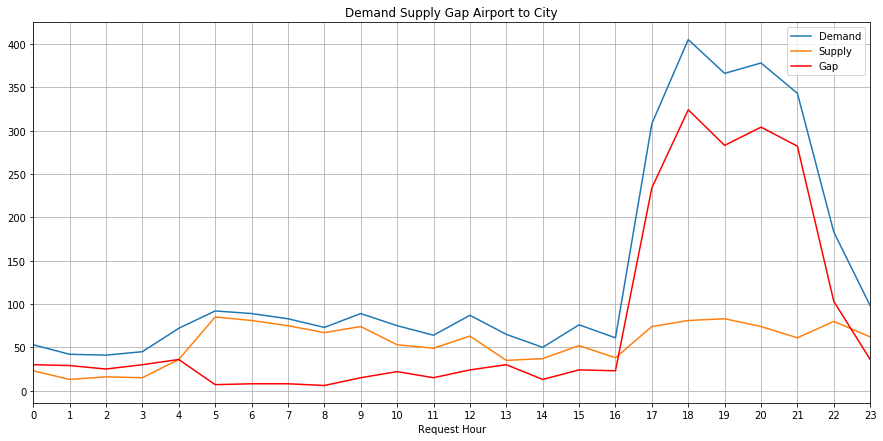

In [25]:
#plot data to show demand supply gap Airport to City
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
airport_pick.groupby(airport_pick['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
airport_pick[airport_pick['Status']=="Trip Completed"].groupby(airport_pick[airport_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(airport_pick.groupby(airport_pick['Request Hour']).count()['Request id'] - airport_pick[airport_pick['Status']=="Trip Completed"].groupby(airport_pick[airport_pick['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap Airport to City")
plt.legend()

In [26]:
# Early Morning - timeslot 00:00:00 to 3:59:59 city-airport & airport-city
early_morning_city = pd.DataFrame(city_pick[(city_pick['Request Hour']<4)]).reset_index()
early_morning_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']<4)]).reset_index()
# Mid Morning - timeslot 04:00:00 to 7:59:59 city-airport & airport-city
mid_morning_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=4) & (city_pick['Request Hour']<8)]).reset_index()
mid_morning_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=4) & (airport_pick['Request Hour']<8)]).reset_index()
# Late Morning - timeslot 08:00:00 to 11:59:59 city-airport & airport-city
late_morning_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=8) & (city_pick['Request Hour']<12)]).reset_index()
late_morning_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=8) & (airport_pick['Request Hour']<12)]).reset_index()
# Afternoon - timeslot 12:00:00 to 15:59:59 city-airport & airport-city
afternoon_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=12) & (city_pick['Request Hour']<16)]).reset_index()
afternoon_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=12) & (airport_pick['Request Hour']<16)]).reset_index()
# Evening - timeslot 16:00:00 to 19:59:59 city-airport & airport-city
evening_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=16) & (city_pick['Request Hour']<20)]).reset_index()
evening_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=16) & (airport_pick['Request Hour']<20)]).reset_index()
# Night - timeslot 20:00:00 to 23:59:59 city-airport & airport-city
night_city = pd.DataFrame(city_pick[(city_pick['Request Hour']>=20)]).reset_index()
night_airport = pd.DataFrame(airport_pick[(airport_pick['Request Hour']>=20)]).reset_index()

In [27]:
def get_percentage(dataset):
  percent = dataset.groupby(['Status']).index.count()/len(dataset)*100
  return percent

Text(0.5, 1.0, 'Night Airport-City')

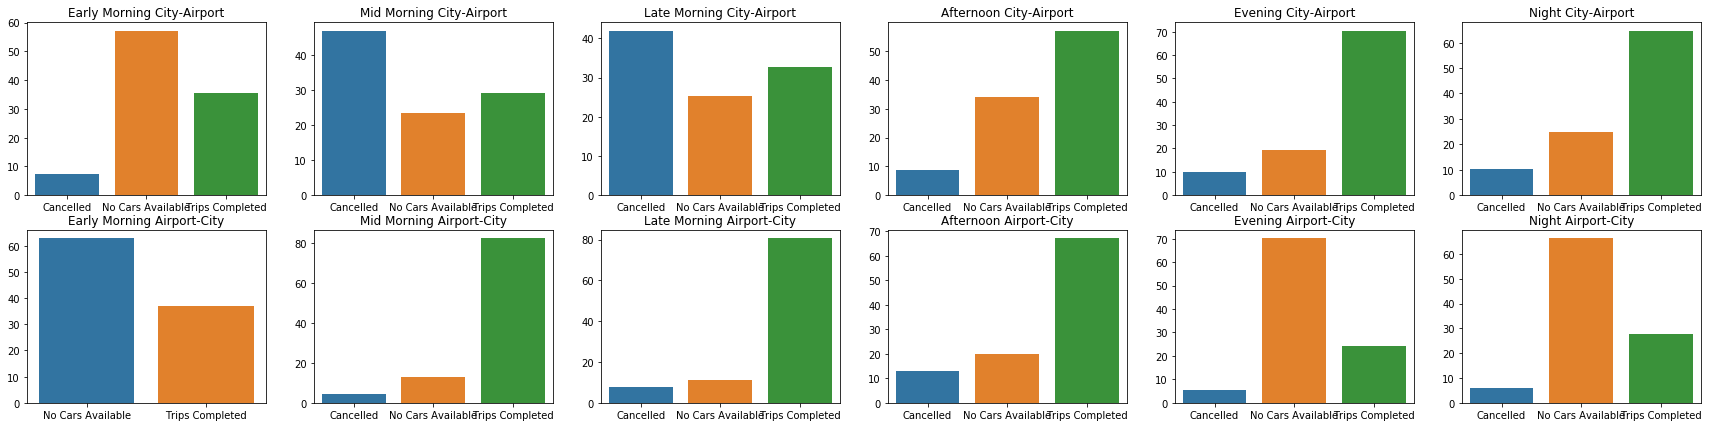

In [28]:
f, axes = plt.subplots(2, 6,figsize=(30, 7))
x = ["Cancelled","No Cars Available","Trips Completed"]
b = ["No Cars Available","Trips Completed"]
sns.barplot(x=x,y=np.array(get_percentage(early_morning_city)), ax = axes[0,0]).set_title('Early Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(mid_morning_city)), ax = axes[0,1]).set_title('Mid Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(late_morning_city)), ax = axes[0,2]).set_title('Late Morning City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(afternoon_city)), ax = axes[0,3]).set_title('Afternoon City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(evening_city)), ax = axes[0,4]).set_title('Evening City-Airport')
sns.barplot(x=x,y=np.array(get_percentage(night_city)), ax = axes[0,5]).set_title('Night City-Airport')
sns.barplot(x=b,y=np.array(get_percentage(early_morning_airport)), ax = axes[1,0]).set_title('Early Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(mid_morning_airport)), ax = axes[1,1]).set_title('Mid Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(late_morning_airport)), ax = axes[1,2]).set_title('Late Morning Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(afternoon_airport)), ax = axes[1,3]).set_title('Afternoon Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(evening_airport)), ax = axes[1,4]).set_title('Evening Airport-City')
sns.barplot(x=x,y=np.array(get_percentage(night_airport)), ax = axes[1,5]).set_title('Night Airport-City')

In [33]:
# Loading iris data set
iris = sns.load_dataset("iris")

<Figure size 1152x1152 with 0 Axes>

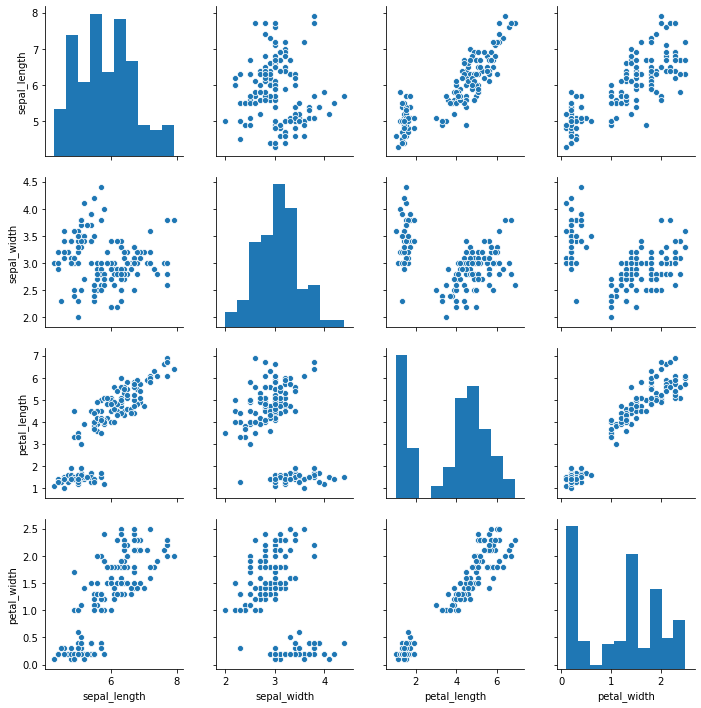

In [36]:
# Pair Plot - histogram on the diagonal
# Pair plot helpse udnerstand relationship between two variables
plt.figure(figsize = (16,16))
sns.pairplot(iris)

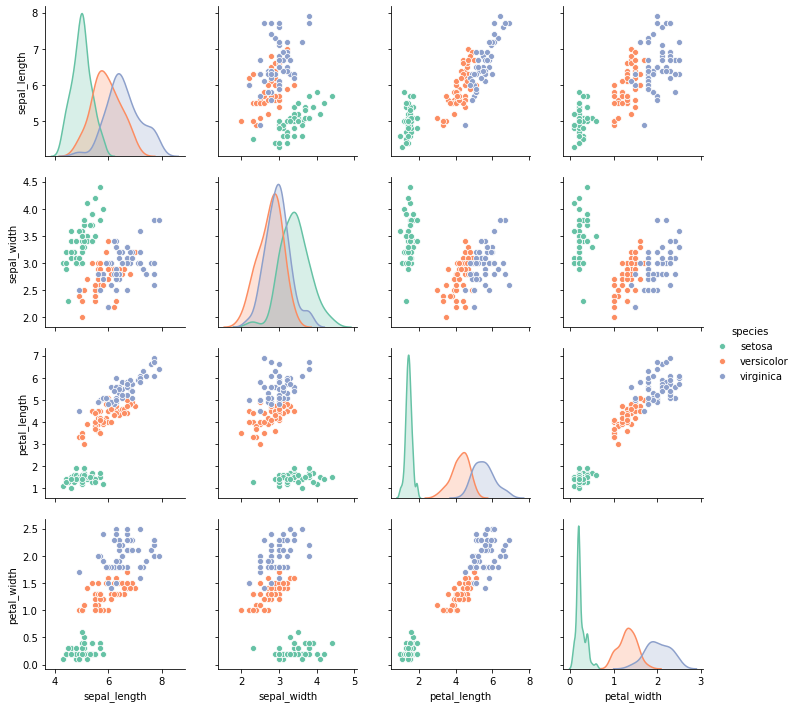

In [37]:
# Pair Plot - regression plots on the off-diagonals and KDEs on the diagonal
sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)

## Function to draw linear regression model

- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression

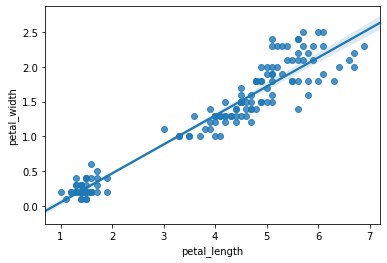

In [43]:
sns.regplot(x="petal_length", y="petal_width", data=iris);

### References:-
-[Detailed Tutorial](https://seaborn.pydata.org/tutorial.html)

In [38]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')